# Amazon レビュー分析

## データ収集


In [ ]:
!curl http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Magazine_Subscriptions.json.gz -o Magazine.gz

In [ ]:
!gzip -d Magazine.gz

In [ ]:
!mv Magazine Magazine.json

## EDA(探索的データ解析)

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
df_f = pd.read_json('Magazine.json', lines=True)
df_f.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [5]:
df_f.shape

(89689, 12)

説明変数として `overall` を取り出す。


In [13]:
y = df_f.loc[:,['overall']]
y.head()

,overall
0,5
1,5
2,3
3,5
4,5


In [31]:
x = df_f.loc[:,['vote', 'verified','reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary']]
x.head()

,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME"
1,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...,The straight scoop
2,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone"
3,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...,THE DISCERNING READER
4,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,A great read every issue.,Five Stars


`overall`（星評価） の記述統計量をとる。

星評価は、順序尺度(ordinal scale) であるため、平均や標準偏差を取ることは意味はないが、中央値


In [32]:
y.describe()

,overall
count,89689.000000
mean,4.036638
std,1.419791
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
x.describe()

,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
count,24103,89689,89689,89689,89689,89656,89670
unique,287,2,5804,72098,2428,79582,51160
top,2,True,"02 20, 2015",A3JPFWKS83R49V,B00005NIOH,Great magazine,Five Stars
freq,6318,58654,146,55,1718,233,14964


### 前処理

欠損値(`NaN`) の有無を調べる


In [34]:
y.isnull().any()

overall    False
dtype: bool

In [35]:
x.isnull().any()

vote           True
verified      False
reviewTime    False
reviewerID    False
asin          False
reviewText     True
summary        True
dtype: bool

今回は、投票の欠損値を `0` で埋める。


In [36]:
x['vote'] = x['vote'].fillna(0)
x.head()

,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME"
1,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...,The straight scoop
2,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone"
3,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...,THE DISCERNING READER
4,0,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,A great read every issue.,Five Stars


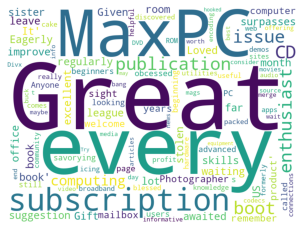

In [64]:
review_text = x['reviewText'].values 

wc = WordCloud(
    width=800, 
    height=600,
    background_color='white'
    )

review_wordcloud = wc.generate(str(review_text))

plt.imshow(review_wordcloud)
plt.axis("off")
plt.show()

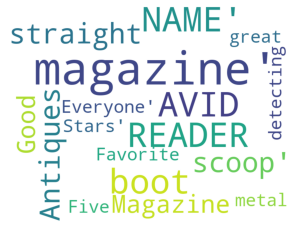

In [62]:
summary_text = x['summary'].values 

summary_wordcloud = wc.generate(str(summary_text))

plt.imshow(review_wordcloud)
plt.axis("off")
plt.show()